### AutoRegression Model
A simplified AR model is an ARIMA model where the integrated(I or 'd') and Moving Average(MA or 'q') components are zero adn we only focus on the autoregression component(AR or 'p').

AutoRegressive model specifies that the output variable depends linearly on it's own past values and a stochastic term. <br>

y_t  = c + a1*(y_t-1) + a2*(y_t-1) + ... +ap(y_t-p) + ep (AR order 'p' model)<br>
c  = constant<br>
ep = noise

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AutoReg, ARResults

In [3]:
# import US population data
df = pd.read_csv('Data/uspopulation.csv', index_col = 'DATE', parse_dates = True)
df.index.freq = 'MS'
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<Axes: xlabel='DATE'>

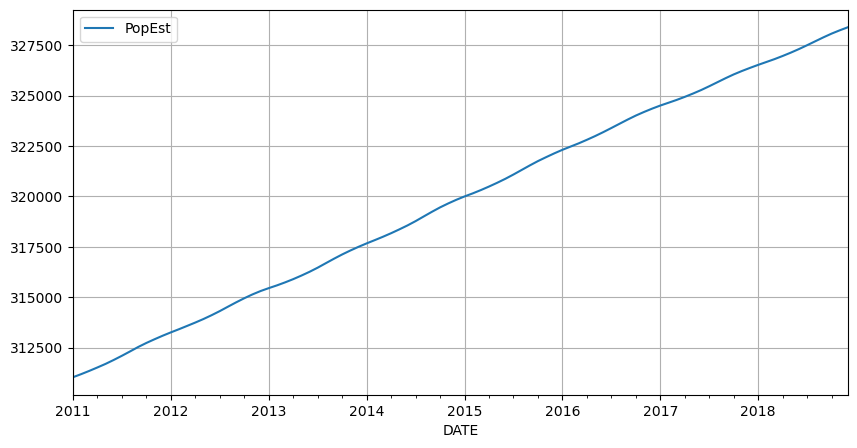

In [4]:
# this data is very linear and easily predictable
df.plot(figsize = (10, 5), grid = True)

In [5]:
len(df)

96

In [6]:
train = df.iloc[:84]
test = df.iloc[84:]

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# AR order 1 model
model1 = AutoReg(train['PopEst'], 1)

In [9]:
res1 = model1.fit()

In [10]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                     AutoReg(1)   Log Likelihood                -380.819
Method:               Conditional MLE   S.D. of innovations             23.789
Date:                Sat, 19 Aug 2023   AIC                            767.638
Time:                        14:26:19   BIC                            774.894
Sample:                    02-01-2011   HQIC                           770.553
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        284.9138    185.428      1.537      0.124     -78.518     648.346
PopEst.L1      0.9997      0.001   1718.076      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [11]:
res1.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [12]:
start = len(train)
end = len(train) + len(test) - 1
print(start)
print(end)

84
95


In [13]:
# make prediction on test set
res1.predict(start, end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [14]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [15]:
# coparing predicted value to test values
pred1 = (res1.predict(start, end)).rename('AR(1) Predictions')

<Axes: xlabel='DATE'>

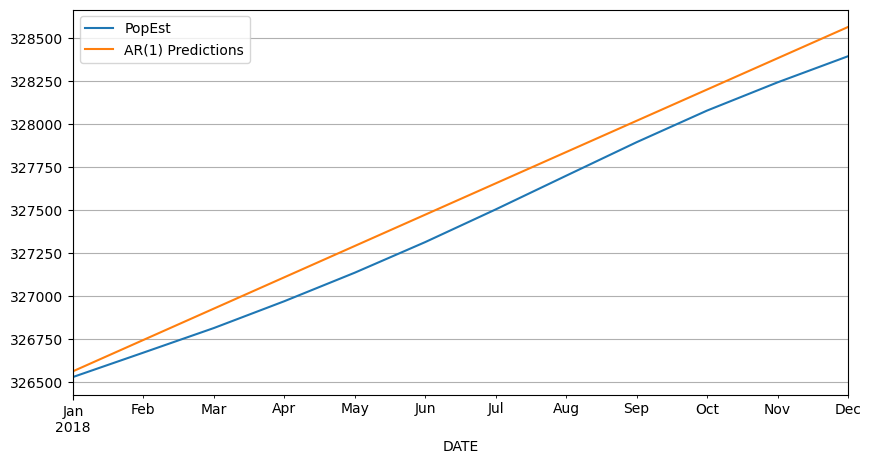

In [16]:
test.plot(figsize = (10, 5), legend = True)
pred1.plot(legend = True, grid = True)

In [17]:
model2 = AutoReg(train['PopEst'], 2).fit()

In [18]:
model2.params

const        137.368305
PopEst.L1      1.853490
PopEst.L2     -0.853836
dtype: float64

In [19]:
pred2 = (model2.predict(start, end)).rename('AR(2) Predictions')

<Axes: xlabel='DATE'>

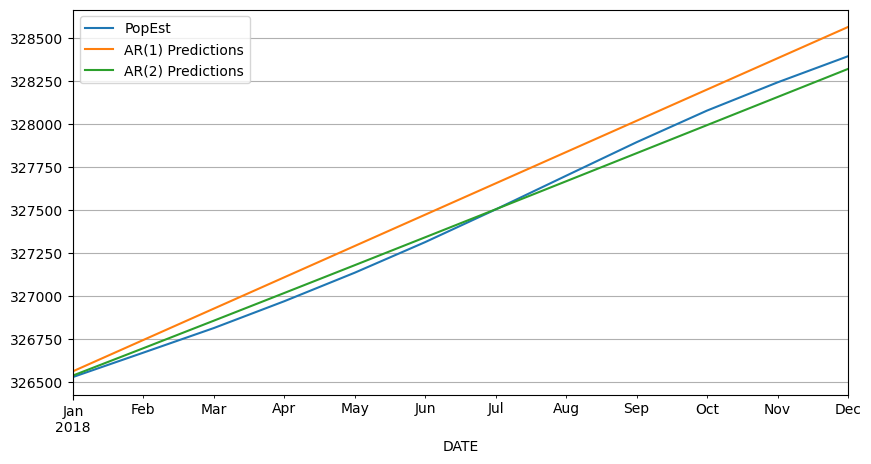

In [20]:
# check order 1 vs order 2 prediction
test.plot(figsize = (10, 5), legend = True)
pred1.plot(legend = True)
pred2.plot(legend = True, grid = True)

### Finding the adequate value of 'p' order

In [21]:
from statsmodels.tsa.ar_model import ar_select_order

In [36]:
mod = ar_select_order(train['PopEst'], ic = 'hqic', maxlag = 12, period = 12)

In [37]:
# check optimum values for lags
mod.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [38]:
# check error values
mod.hqic

{(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): 450.8550975024766,
 (1, 2, 3, 4, 5, 6, 7, 8): 467.09608179024747,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): 467.72649234592785,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 467.7581740099263,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): 470.6535784295603,
 (1, 2, 3, 4, 5): 476.6308672953663,
 (1, 2, 3, 4, 5, 6): 477.38045988747007,
 (1, 2, 3, 4, 5, 6, 7): 478.65069393242635,
 (1, 2, 3): 480.33629333163907,
 (1, 2, 3, 4): 481.71430350418865,
 (1, 2): 573.7316307144054,
 (1,): 668.7216098566987,
 0: 1397.9645677033775}

We can see that models that are using all lags from 1 - 12 have the least error, however, model with 8 lags is simpler and has the second best performance.

In [25]:
mod.aic

{(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12): 439.07257969297405,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10): 457.7883512480395,
 (1, 2, 3, 4, 5, 6, 7, 8, 9): 458.66301710784893,
 (1, 2, 3, 4, 5, 6, 7, 8): 458.9389540759765,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11): 459.7774081438656,
 (1, 2, 3, 4, 5, 6): 471.03602722081484,
 (1, 2, 3, 4, 5): 471.19278215251893,
 (1, 2, 3, 4, 5, 6, 7): 471.39991374196325,
 (1, 2, 3): 476.7109032364075,
 (1, 2, 3, 4): 477.1825658851492,
 (1, 2): 571.0125881429817,
 (1,): 666.908914809083,
 0: 1397.0582201795696}

### Create models of order 8 and 12

In [26]:
model8 = AutoReg(train['PopEst'], lags = 8).fit()
model12 = AutoReg(train['PopEst'], lags = 12).fit()

In [27]:
pred8 = (model8.predict(start, end)).rename('AR(8) Predictions')
pred12 = (model12.predict(start, end)).rename('AR(12) Predictions')

In [28]:
preds = [pred1, pred2, pred8, pred12]

<Axes: title={'center': 'performace of different order models'}, xlabel='DATE'>

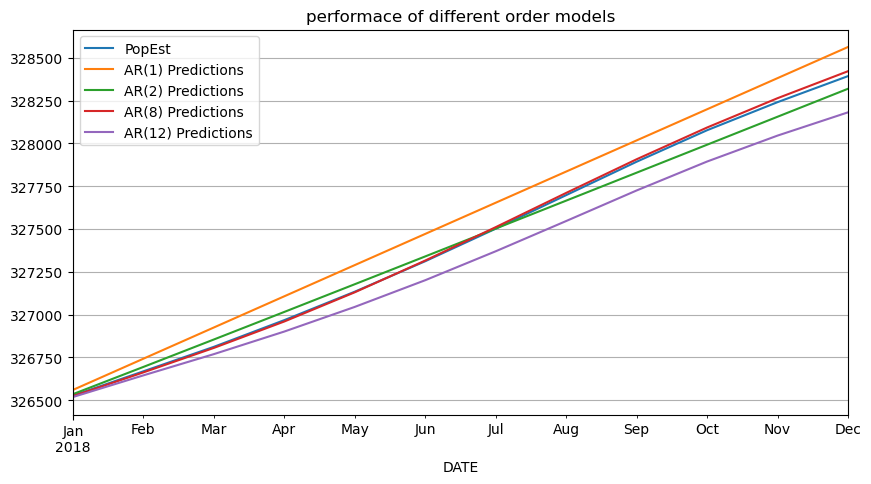

In [29]:
test.plot(figsize = (10, 5), legend = True)
pred1.plot(legend = True)
pred2.plot(legend = True)
pred8.plot(legend = True)
pred12.plot(legend = True, grid = True, title = 'performace of different order models')

We can see that although order 12 had the least hqic value, it fits poorly to the test data.

In [30]:
from sklearn.metrics import mean_squared_error

In [35]:
labels = ['AR1', 'AR2', 'AR8', 'AR12']

for i in range(4):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} error MSE was: {error}')

AR1 error MSE was: 17449.714237833407
AR2 error MSE was: 2713.258683710818
AR8 error MSE was: 186.97263605698208
AR12 error MSE was: 17649.943873430686


In [39]:
# prediction into the future

model = AutoReg(df['PopEst'], lags = 8).fit()

In [41]:
forecast_2020 = (model.predict(start = (len(df)), end = len(df) + 12)).rename('Forecasted 2020')

<Axes: xlabel='DATE'>

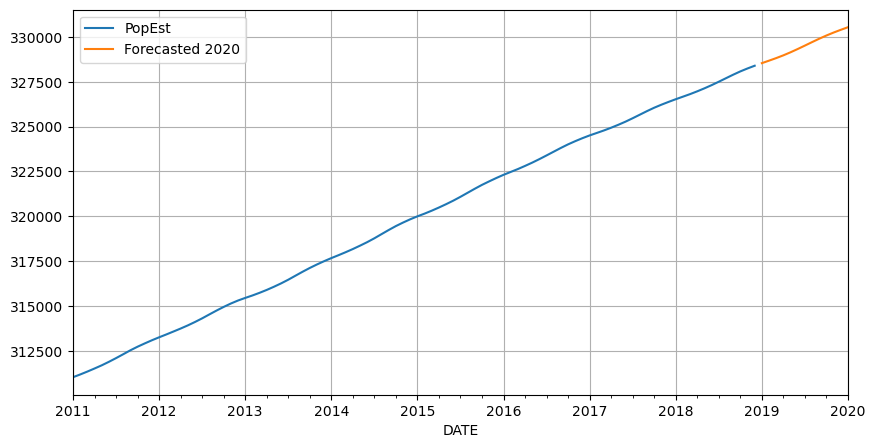

In [44]:
df['PopEst'].plot(figsize = (10, 5), legend = True)
forecast_2020.plot(grid = True, legend = True)